In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import box
import geopandas as gpd
from subs import ptsinpoly
from matplotlib.patches import Polygon as MplPolygon

In [2]:
npfile = np.load(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\theilslopes_DTW.npz')
print(npfile.files)

['dtw_syr', 'dtw_condyr', 'dtw_s_nmax_yr', 'dtw_nmax_yr', 'dtw_vyr', 'dtw_tyr', 'dtw_resyr', 'HydroID', 'lat', 'lon', 'dtw_interc_t', 'dtw_slop_t']


In [3]:
dtw_syr       = npfile.f.dtw_syr
dtw_condyr    = npfile.f.dtw_condyr
dtw_s_nmax_yr = npfile.f.dtw_s_nmax_yr
dtw_nmax_yr   = npfile.f.dtw_nmax_yr
dtw_tyr       = npfile.f.dtw_tyr
dtw_vyr       = npfile.f.dtw_vyr
dtw_resyr     = npfile.f.dtw_resyr
HydroID       = npfile.f.HydroID
lat           = npfile.f.lat
lon           = npfile.f.lon
dtw_interc_t  = npfile.f.dtw_interc_t
dtw_slop_t    = npfile.f.dtw_slop_t

In [4]:
for key in npfile.files:
    data = npfile[key]
    total = data.size  # Total de datos
    non_nan = np.count_nonzero(~np.isnan(data))  # Datos que no son NaN
    non_zero = np.count_nonzero(data)  # Datos que no son cero
    print(f"Variable '{key}':")
    print(f"  Total de datos: {total}")
    print(f"  Datos válidos (no NaN): {non_nan}")
    print(f"  Datos no cero: {non_zero}\n")

Variable 'dtw_syr':
  Total de datos: 27544
  Datos válidos (no NaN): 27544
  Datos no cero: 27544

Variable 'dtw_condyr':
  Total de datos: 27544
  Datos válidos (no NaN): 27544
  Datos no cero: 13255

Variable 'dtw_s_nmax_yr':
  Total de datos: 27544
  Datos válidos (no NaN): 27544
  Datos no cero: 12030

Variable 'dtw_nmax_yr':
  Total de datos: 27544
  Datos válidos (no NaN): 27544
  Datos no cero: 13255

Variable 'dtw_vyr':
  Total de datos: 1487376
  Datos válidos (no NaN): 697394
  Datos no cero: 1487337

Variable 'dtw_tyr':
  Total de datos: 1487376
  Datos válidos (no NaN): 1487376
  Datos no cero: 1459832

Variable 'dtw_resyr':
  Total de datos: 137720
  Datos válidos (no NaN): 66275
  Datos no cero: 137716

Variable 'HydroID':
  Total de datos: 27544
  Datos válidos (no NaN): 27544
  Datos no cero: 27544

Variable 'lat':
  Total de datos: 27544
  Datos válidos (no NaN): 27423
  Datos no cero: 27544

Variable 'lon':
  Total de datos: 27544
  Datos válidos (no NaN): 27423
  Da

In [5]:
regiones = gpd.read_file(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\ARTÍCULO\australia_aquifers.shp')
print(regiones.columns)

Index(['Aquifer', 'Broader', 'Details', 'line_width', 'geometry'], dtype='object')


In [6]:
dtw_slop_t_valid = dtw_slop_t[~np.isnan(dtw_slop_t)] ## quito los valores nan de la serie

In [7]:
regiones_coords = [
    {
        'Broader': region['Broader'],
        'pflat': region.geometry.exterior.xy[1],  # Latitudes del polígono
        'pflon': region.geometry.exterior.xy[0],  # Longitudes del polígono
    }
    for _, region in regiones.iterrows()
]

In [8]:
# calcular estadísticas
mean = np.mean(dtw_slop_t_valid)
median = np.median(dtw_slop_t_valid)
std_dev = np.std(dtw_slop_t_valid)
variance = np.var(dtw_slop_t_valid)  
skewness = skew(dtw_slop_t_valid)  
kurt = kurtosis(dtw_slop_t_valid)  

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_6944\3531837936.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


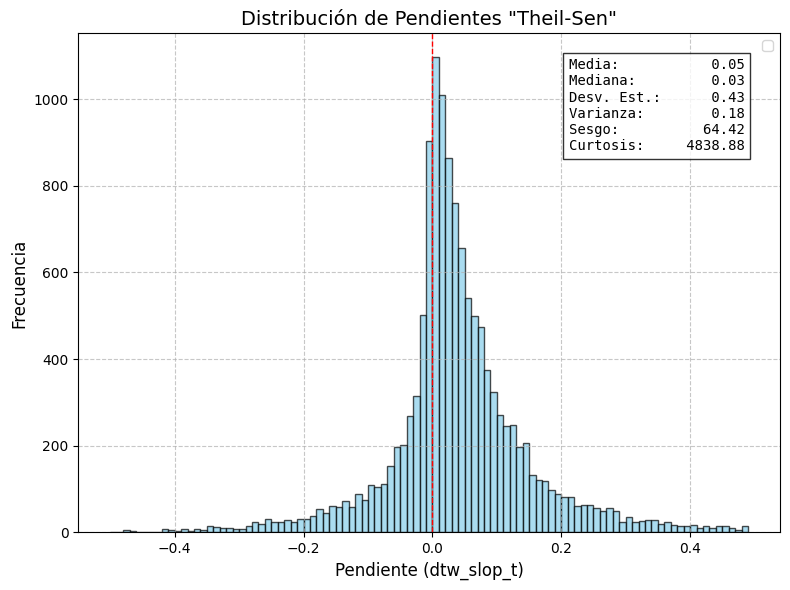

In [9]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.hist(dtw_slop_t_valid, bins=np.arange(-0.5, 0.5, 0.01), color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_title('Distribución de Pendientes "Theil-Sen"', fontsize=14)
ax1.set_xlabel('Pendiente (dtw_slop_t)', fontsize=12)
ax1.set_ylabel('Frecuencia', fontsize=12)
ax1.grid(axis='both', linestyle='--', alpha=0.7)

# Línea vertical en cero
ax1.axvline(x=0, color='red', linestyle='--', linewidth=1)

# Texto de estadísticas con alineación perfecta
stats_text = (
    f'{"Media:":<12} {mean:>8.2f}\n'
    f'{"Mediana:":<12} {median:>8.2f}\n'
    f'{"Desv. Est.:":<12} {std_dev:>8.2f}\n'
    f'{"Varianza:":<12} {variance:>8.2f}\n'
    f'{"Sesgo:":<12} {skewness:>8.2f}\n'
    f'{"Curtosis:":<12} {kurt:>8.2f}'
)

# Posición del texto (esquina superior derecha)
plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8), 
         fontfamily='monospace')  # Usar fuente monoespaciada para mejor alineación

plt.legend()
plt.tight_layout()
plt.savefig(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\histogramas\histograma_theilsen', dpi=300, bbox_inches='tight')
plt.show()

#### Histogramas: Regiones

In [10]:
# Crear lista de geometrías de puntos
puntos_geom = [Point(lon[i], lat[i]) for i in range(len(lon))]

# 4. Realizar join espacial manualmente
broaders = np.empty(len(puntos_geom), dtype=object)
broaders[:] = None  # Inicializar como None

for idx, acuifero in regiones.iterrows():
    poly = acuifero.geometry
    mask = np.array([poly.contains(p) for p in puntos_geom])
    broaders[mask] = acuifero['Broader']

# 5. Filtrar datos válidos
valid_mask = ~np.isnan(dtw_slop_t) & (broaders != None)
dtw_valid = dtw_slop_t[valid_mask]
broaders_valid = broaders[valid_mask]

# 6. Obtener acuíferos únicos
unique_broaders = np.unique(broaders_valid)

# 7. Crear histogramas
output_folder = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\histogramas\regiones'
os.makedirs(output_folder, exist_ok=True)

for acuifero in unique_broaders:
    if acuifero == '-':  # Saltar acuíferos sin nombre
        continue
        
    mask = broaders_valid == acuifero
    datos = dtw_valid[mask]
    
    if len(datos) > 0:
        # Calcular estadísticas
        stats = {
            'Media:': np.mean(datos),
            'Mediana:': np.median(datos),
            'Desv. Est.:': np.std(datos),
            'Varianza:': np.var(datos),
            'Sesgo:': skew(datos),
            'Curtosis:': kurtosis(datos)
        }
        
        # Crear histograma
        plt.figure(figsize=(10, 6))
        plt.hist(datos, bins=np.arange(-0.5, 0.5, 0.01), 
                color='skyblue', edgecolor='black', alpha=0.7)
        
        # Añadir línea en cero
        plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
        
        # Configuración del gráfico
        plt.title(f'Distribución de Pendientes - {acuifero}', fontsize=14)
        plt.xlabel('Pendiente (dtw_slop_t)', fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.grid(axis='both', linestyle='--', alpha=0.7)
        
        # Añadir texto de estadísticas
        stats_text = '\n'.join([f'{k:<12} {v:>8.2f}' for k, v in stats.items()])
        plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontfamily='monospace')
        
        # Guardar figura
        nombre_archivo = f"histograma_{acuifero.replace(' ', '_').replace('/', '_')}.png"
        plt.savefig(os.path.join(output_folder, nombre_archivo), 
                  dpi=300, bbox_inches='tight')
        plt.close()
        
        print(f"Histograma creado para: {acuifero}")
    else:
        print(f"Advertencia: No hay datos válidos para {acuifero}")

print("Proceso completado. Histogramas guardados en:", output_folder)

Histograma creado para: Amadeus Basin
Histograma creado para: Daly-Wiso-Georgina Basins
Histograma creado para: Eucla Basin
Histograma creado para: Gippsland Basin
Histograma creado para: Great Artesian Basin
Histograma creado para: Hamersley Basin
Histograma creado para: Murray Basin
Histograma creado para: Otway Basin
Histograma creado para: Perth Basin
Histograma creado para: Pilbara Craton
Histograma creado para: St Vincent Basin
Proceso completado. Histogramas guardados en: G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\histogramas\regiones


#### Histogramas: Grillas_ 1°, 2°, 3°, 4° y 5°

In [11]:
# Límites de Australia (aproximados en latitud y longitud)
min_lat, max_lat = -44, -10
min_lon, max_lon = 112, 154

In [12]:
cell_size = 1.0 ## Se cambia según el tamaño de la grilla que se quiera
umbral_min_puntos = 20  # Mínimo de puntos por celda

# Crear las coordenadas de la grilla
lat_edges = np.arange(min_lat, max_lat + cell_size, cell_size)
lon_edges = np.arange(min_lon, max_lon + cell_size, cell_size)

# Coordenadas centrales de cada celda
lat_centers = (lat_edges[:-1] + lat_edges[1:]) / 2
lon_centers = (lon_edges[:-1] + lon_edges[1:]) / 2

In [13]:
celdas = []
for i in range(len(lat_edges) - 1):
    for j in range(len(lon_edges) - 1):
        celdas.append(Polygon([
            (lon_edges[j], lat_edges[i]),
            (lon_edges[j + 1], lat_edges[i]),
            (lon_edges[j + 1], lat_edges[i + 1]),
            (lon_edges[j], lat_edges[i + 1]),
            (lon_edges[j], lat_edges[i])
        ]))

In [14]:
resultados_grilla = []

for celda in celdas:
    # Extraer los vértices del polígono directamente
    pflat = np.array(celda.exterior.xy[1])  # Latitudes
    pflon = np.array(celda.exterior.xy[0])  # Longitudes

    # Usar ptsinpoly para verificar puntos en la celda
    indices_dentro = ptsinpoly(pflat, pflon, npfile.f.lat, npfile.f.lon)

    # Extraer los puntos dentro de la celda
    dtw_dentro = dtw_slop_t[indices_dentro]

    # Calcular el centroide de la celda para referencia
    center = celda.centroid.coords[0]

    # Almacenar resultados por celda
    resultados_grilla.append({
        'center': center,
        'dtw_slop_t': dtw_dentro
    })

KeyboardInterrupt: 

In [15]:
ruta_shapefile = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\australia_aquifers.shp'  
australia = gpd.read_file(ruta_shapefile)

C:\Users\AFANDINOP\AppData\Local\Temp\ipykernel_6944\1966727047.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


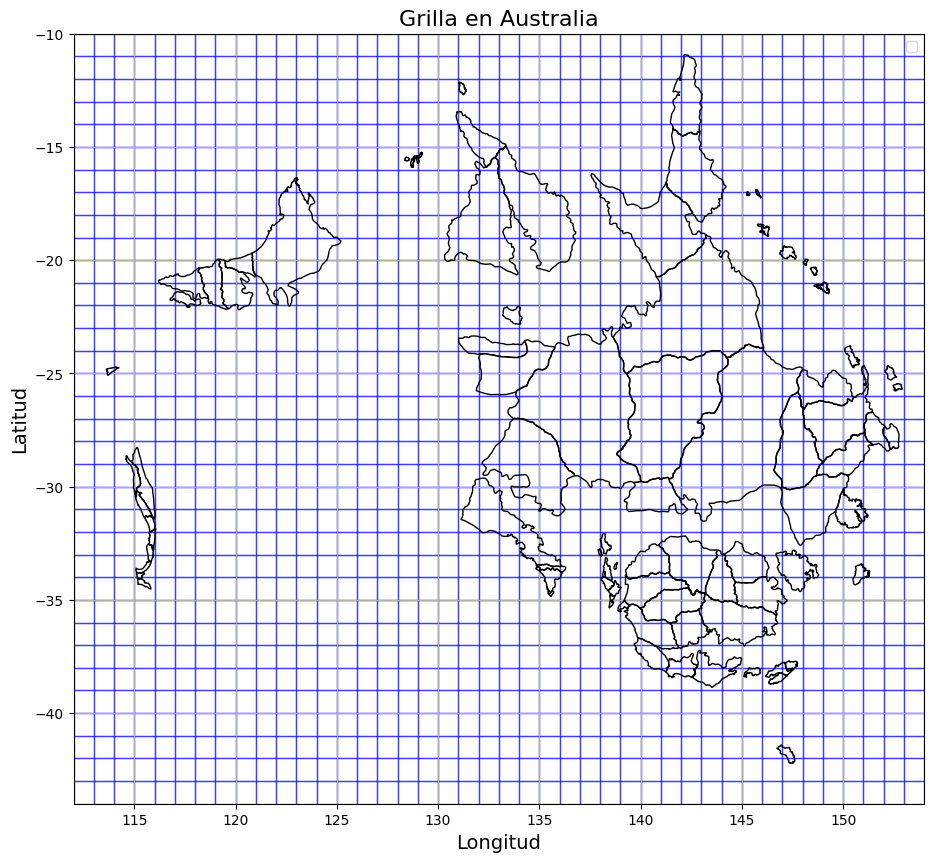

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))

# Dibuja el contorno de Australia
australia.boundary.plot(ax=ax, color='black', linewidth=1)

# Dibuja cada celda en la grilla
for celda in celdas:
    patch = MplPolygon(np.array(celda.exterior.xy).T, edgecolor='blue', facecolor='none', alpha=0.5)
    ax.add_patch(patch)

# Configurar límites y etiquetas
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)
ax.set_title('Grilla en Australia', fontsize=16)
ax.set_xlabel('Longitud', fontsize=14)
ax.set_ylabel('Latitud', fontsize=14)
plt.grid(True)
plt.legend()
plt.savefig(r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\histogramas\grilla\grilla_5°\grilla_5°.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
output_folder = r'G:\Mi unidad\Maestria\Proyecto de Grado\analisis_nf\datos\australia\_01_imagenes\histogramas\grilla\grilla_1°'

for i, r in enumerate(resultados_grilla):
    # Filtrar los datos para que estén entre -0.5 y 0.5
    datos_validos = r['dtw_slop_t'][(r['dtw_slop_t'] >= -0.5) & (r['dtw_slop_t'] <= 0.5)]
    
    # Verificación de los datos filtrados
    if len(datos_validos) < 20:
        # Saltar celdas con menos de 10 datos válidos
        continue

    # Centro de la celda
    lat, lon = r['center']
    
    # Calcular estadísticas
    mean = np.mean(datos_validos)
    median = np.median(datos_validos)
    std_dev = np.std(datos_validos)
    variance = np.var(datos_validos)  
    skewness = skew(datos_validos)  
    kurt = kurtosis(datos_validos)  

    # Crear el histograma
    plt.figure(figsize=(8, 6))
    plt.hist(datos_validos, bins=np.arange(-0.5, 0.5, 0.01), color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Histograma - Centro: ({lat:.2f}, {lon:.2f})', fontsize=14)
    plt.xlabel('Pendiente (dtw_slop_t)', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)

    # Añadir estadísticas al gráfico
    stats_text = (f'Media = {mean:.3f}\nMediana = {median:.3f}\n'
        f'Desv. Est. = {std_dev:.3f}\nVarianza = {variance:.3f}\n'
        f'Sesgo = {skewness:.3f}\nCurtosis = {kurt:.3f}')
    plt.text(0.05, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

    # Guardar el histograma
    output_path = os.path.join(output_folder, f"Celda_{lat:.2f}_{lon:.2f}.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()